<a href="https://colab.research.google.com/github/prunojumah/prunojumah/blob/master/IP_WEEK_2_PRUNO_JUMAH.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [296]:
# 1. Specifying the data analysis question
#     To figure out how we can predict which individuals are most likely to have
#     or use a bank account
#
# 2. Defining Metric for Success
#     The objective will have been met we have identified the following:
#        1. A model which can predict which individuals are most likely  to use
#           or have a bank account is obtained
#        2. There is an increase in the number of people having bank accounts
#        3. Retain the customers already having bank accounts
#
# 3. Understanding the context
#     Financial Inclusion remains one of the main obstacles to economic and 
#     human development in Africa. For example, across Kenya, Rwanda, Tanzania
#     and Uganda only 9.1 million adults (or 13.9% of the adult population) have
#     access to or use a commercial bank account.
#     Traditionally, access to bank accounts has been regarded as an indicator
#     of financial inclusion. Despite the proliferation of mobile money in
#     Africa and the growth of innovative fintech solutions, banks still play 
#     a pivotal role in facilitating access to financial services. Access to 
#     bank accounts enables households to save and facilitate payments while 
#     helping businesses build up their credit-worthiness and improve their 
#     access to other financial services. Therefore, access to bank accounts is 
#     an essential contributor to long-term economic growth.
#
# 4. Recording the experimental design     
#     a. Load datasets
#     b. Check for anomalies and missing data
#     c. Check for duplicates
#     d. Drop duplicates and missing values if present
#     e. Clean the data and perform univariate analysis
#     f. Perform bivariate followed by multivariate analysis
#     g. Perform Principal Component Analysis
#     h. Challenge solution by providing insights on how to make improvements 
#
#
#
# 5. Data Analysis
#
#
#
#Importing the relevant libraries
import pandas.util.testing as tm
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
from matplotlib import pyplot as plt

In [297]:
#reading data from our sources
Variable_definitions = pd.read_csv('/content/VariableDefinitions.csv')
Variable_definitions.head()

,Variable Definitions,Unnamed: 1
0,country,Country interviewee is in.
1,year,Year survey was done in.
2,uniqueid,Unique identifier for each interviewee
3,location_type,"Type of location: Rural, Urban"
4,cellphone_access,"If interviewee has access to a cellphone: Yes, No"


In [298]:
#Loading the second dataset
Financial_dataset = pd.read_csv('/content/Financial Dataset - 1.csv')
Financial_dataset.head()

,country,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3.0,24.0,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5.0,70.0,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5.0,26.0,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5.0,34.0,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8.0,26.0,Male,Child,Single/Never Married,Primary education,Informally employed


In [299]:
#Chacking the shape of the dataset
print(Financial_dataset.shape)

(23524, 13)


In [300]:
#Checking for missing values in the dataset and replacing them
Financial_dataset.isnull().values.any()

True

In [301]:
Financial_dataset.country.unique()

array(['Kenya', 'Rwanda', 'Tanzania', nan, 'Uganda'], dtype=object)

In [302]:
#Dropping the rows with the null values
df = Financial_dataset.dropna(axis=0, how="any")
df


,country,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3.0,24.0,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5.0,70.0,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5.0,26.0,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5.0,34.0,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8.0,26.0,Male,Child,Single/Never Married,Primary education,Informally employed
...,...,...,...,...,...,...,...,...,...,...,...,...,...
23519,Uganda,2018,uniqueid_2113,No,Rural,Yes,4.0,48.0,Female,Head of Household,Divorced/Seperated,No formal education,Other Income
23520,Uganda,2018,uniqueid_2114,No,Rural,Yes,2.0,27.0,Female,Head of Household,Single/Never Married,Secondary education,Other Income
23521,Uganda,2018,uniqueid_2115,No,Rural,Yes,5.0,27.0,Female,Parent,Widowed,Primary education,Other Income
23522,Uganda,2018,uniqueid_2116,No,Urban,Yes,7.0,30.0,Female,Parent,Divorced/Seperated,Secondary education,Self employed


In [303]:

#Counting the number of entries
print(df[df['country'] == 'Rwanda'].count())
print(df[df['country'] == 'Tanzania'].count())
print(df[df['country'] == 'Kenya'].count())
print(df[df['country'] == 'Uganda'].count())



country                   8684
year                      8684
uniqueid                  8684
Has a Bank account        8684
Type of Location          8684
Cell Phone Access         8684
household_size            8684
Respondent Age            8684
gender_of_respondent      8684
The relathip with head    8684
marital_status            8684
Level of Educuation       8684
Type of Job               8684
dtype: int64
country                   6500
year                      6500
uniqueid                  6500
Has a Bank account        6500
Type of Location          6500
Cell Phone Access         6500
household_size            6500
Respondent Age            6500
gender_of_respondent      6500
The relathip with head    6500
marital_status            6500
Level of Educuation       6500
Type of Job               6500
dtype: int64
country                   6064
year                      6064
uniqueid                  6064
Has a Bank account        6064
Type of Location          6064
Cell Phone Ac

In [304]:
#Getting general description of the data
df.describe()


,year,household_size,Respondent Age
count,23343.000000,23343.000000,23343.000000
mean,2016.980594,3.688643,38.805509
std,0.901740,2.281184,16.519803
min,2016.000000,0.000000,16.000000
25%,2016.000000,2.000000,26.000000
50%,2017.000000,3.000000,35.000000
75%,2018.000000,5.000000,49.000000
max,2056.000000,21.000000,100.000000


In [305]:
#Capitalizing the column names to enhance uniformity
df.columns = df.columns.str.upper().str.strip().str.replace(' ','_').str.replace('.','')
df.columns

Index(['COUNTRY', 'YEAR', 'UNIQUEID', 'HAS_A_BANK_ACCOUNT', 'TYPE_OF_LOCATION',
       'CELL_PHONE_ACCESS', 'HOUSEHOLD_SIZE', 'RESPONDENT_AGE',
       'GENDER_OF_RESPONDENT', 'THE_RELATHIP_WITH_HEAD', 'MARITAL_STATUS',
       'LEVEL_OF_EDUCUATION', 'TYPE_OF_JOB'],
      dtype='object')

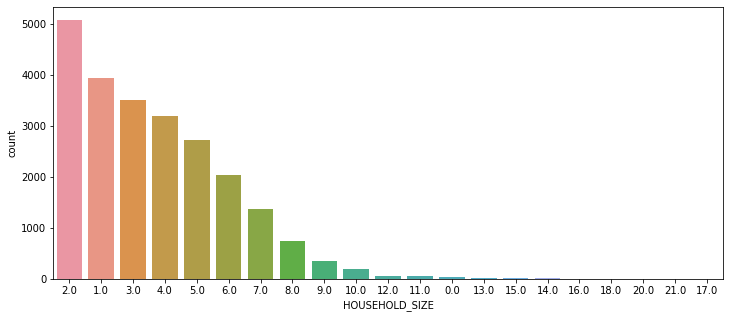

In [306]:
plt.figure(figsize=(12, 5))
sns.countplot(df.HOUSEHOLD_SIZE.dropna(), order = df.HOUSEHOLD_SIZE.value_counts().index);

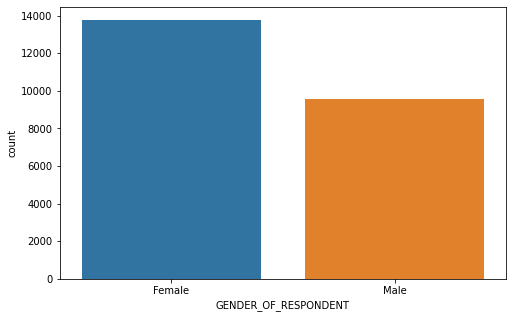

In [307]:
plt.figure(figsize=(8, 5))
sns.countplot(df.GENDER_OF_RESPONDENT.dropna(), order = df.GENDER_OF_RESPONDENT.value_counts().index);


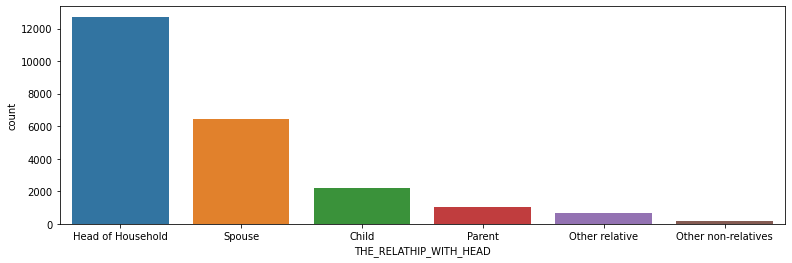

In [308]:
plt.figure(figsize=(13, 4))
sns.countplot(df.THE_RELATHIP_WITH_HEAD.dropna(), order = df.THE_RELATHIP_WITH_HEAD.value_counts().index);

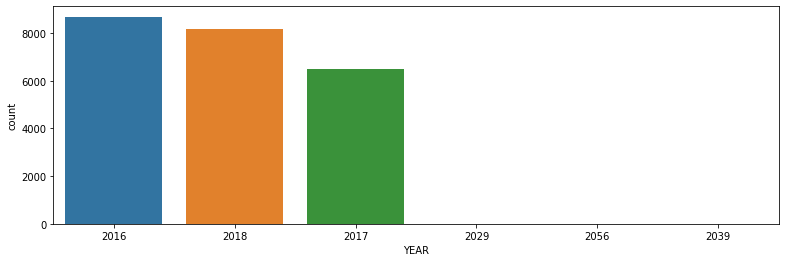

In [309]:
plt.figure(figsize=(13, 4))
sns.countplot(df.YEAR.dropna(), order = df.YEAR.value_counts().index);

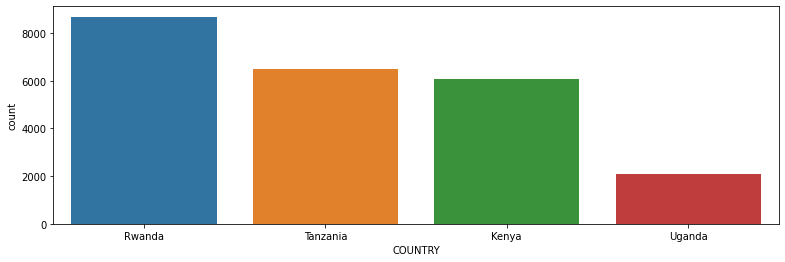

In [310]:
plt.figure(figsize=(13, 4))
sns.countplot(df.COUNTRY.dropna(), order = df.COUNTRY.value_counts().index);

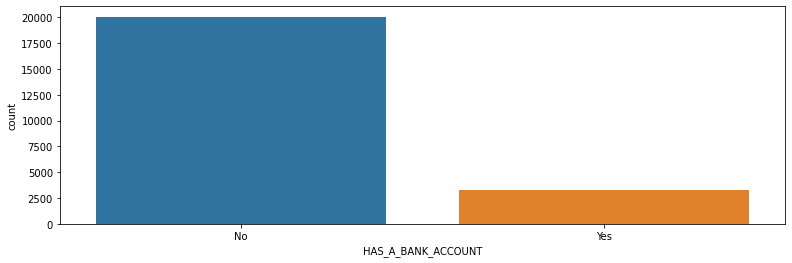

In [311]:
plt.figure(figsize=(13, 4))
sns.countplot(df.HAS_A_BANK_ACCOUNT.dropna(), order = df.HAS_A_BANK_ACCOUNT.value_counts().index);

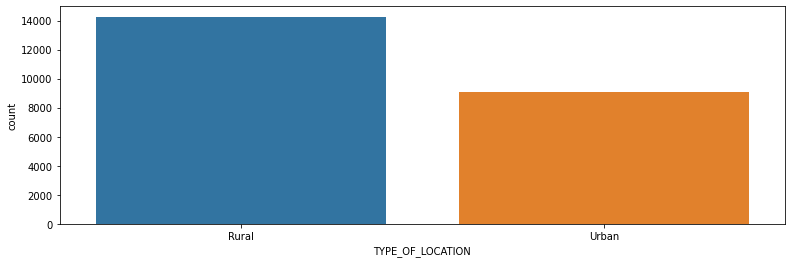

In [312]:
plt.figure(figsize=(13, 4))
sns.countplot(df.TYPE_OF_LOCATION.dropna(), order = df.TYPE_OF_LOCATION.value_counts().index);

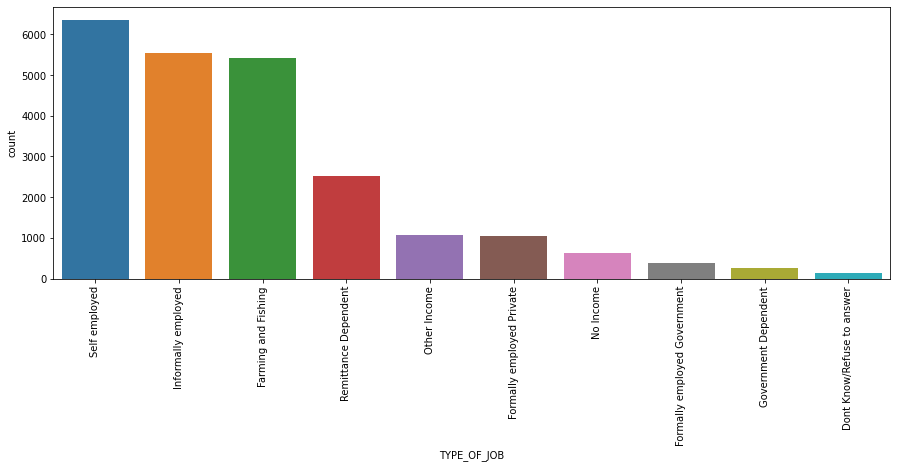

In [313]:

plt.figure(figsize=(15, 5))
sns.countplot(df.TYPE_OF_JOB.dropna(), order = df.TYPE_OF_JOB.value_counts().index);
plt.xticks(rotation=90);

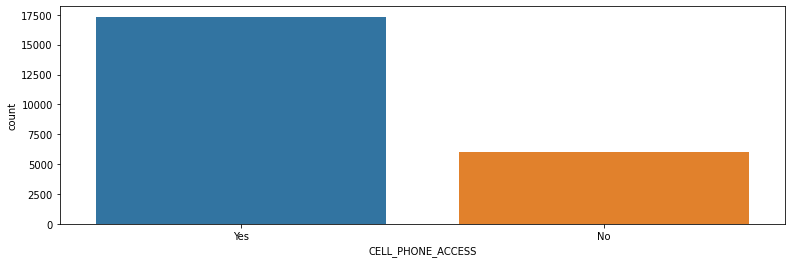

In [314]:
plt.figure(figsize=(13, 4))
sns.countplot(df.CELL_PHONE_ACCESS.dropna(), order = df.CELL_PHONE_ACCESS.value_counts().index);

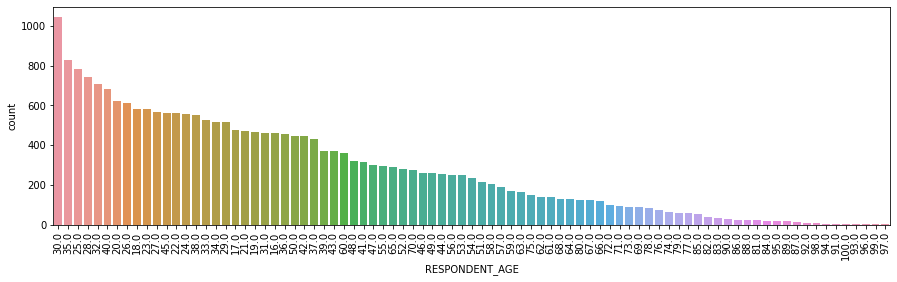

In [315]:
plt.figure(figsize=(15, 4))
sns.countplot(df.RESPONDENT_AGE.dropna(), order = df.RESPONDENT_AGE.value_counts().index);
plt.xticks(rotation=90);

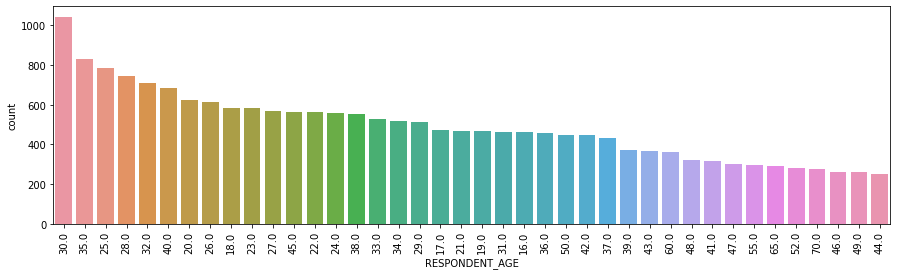

In [316]:
#Previewing the top 40 entries in the graph
plt.figure(figsize=(15, 4))
sns.countplot(df.RESPONDENT_AGE.dropna(), order = df.RESPONDENT_AGE.value_counts().iloc[:40].index)
plt.xticks(rotation=90);

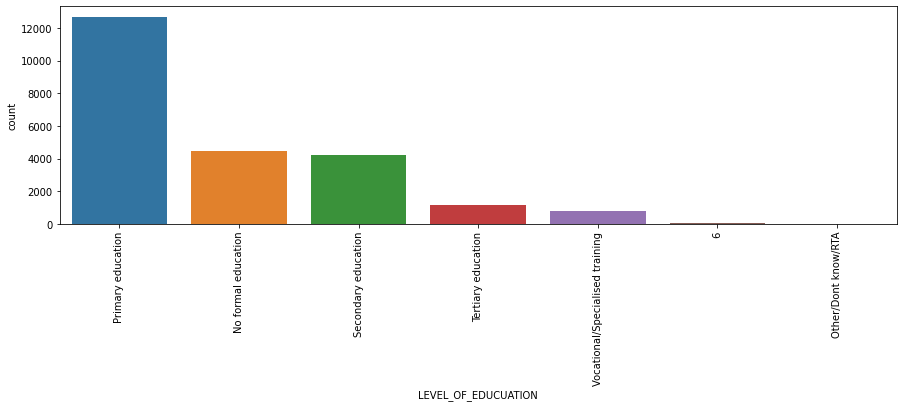

In [317]:

plt.figure(figsize=(15, 4))
sns.countplot(df.LEVEL_OF_EDUCUATION.dropna(), order = df.LEVEL_OF_EDUCUATION.value_counts().index);
plt.xticks(rotation=90);

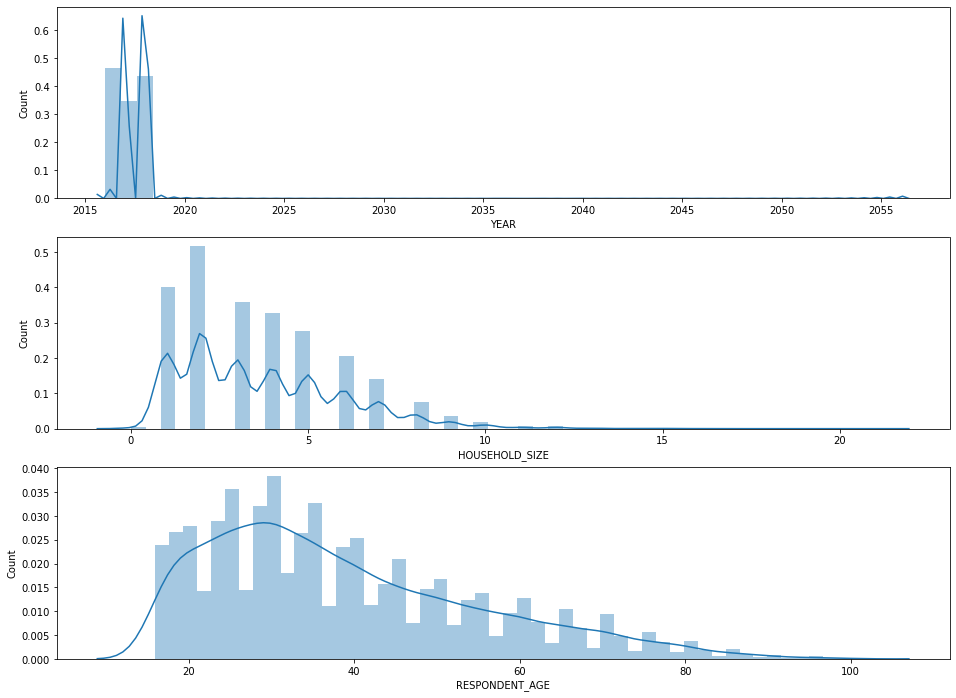

In [318]:
column_names = ['YEAR','HOUSEHOLD_SIZE', 'RESPONDENT_AGE']

fig, ax = plt.subplots(len(column_names), figsize=(16,12))

for i, col_val in enumerate(column_names):

    sns.distplot(df[col_val], hist=True, ax=ax[i])
    ax[i].set_xlabel(col_val, fontsize=10)
    ax[i].set_ylabel('Count', fontsize=10)

plt.show()

<Figure size 1008x1008 with 0 Axes>

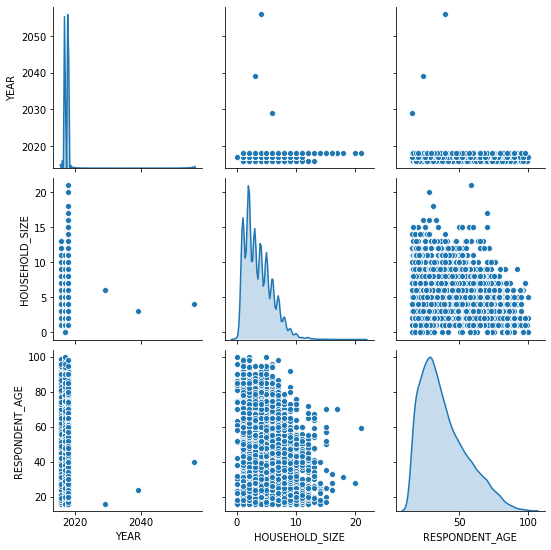

In [319]:
plt.figure(figsize=(14, 14))

sns.pairplot(df, diag_kind='kde');

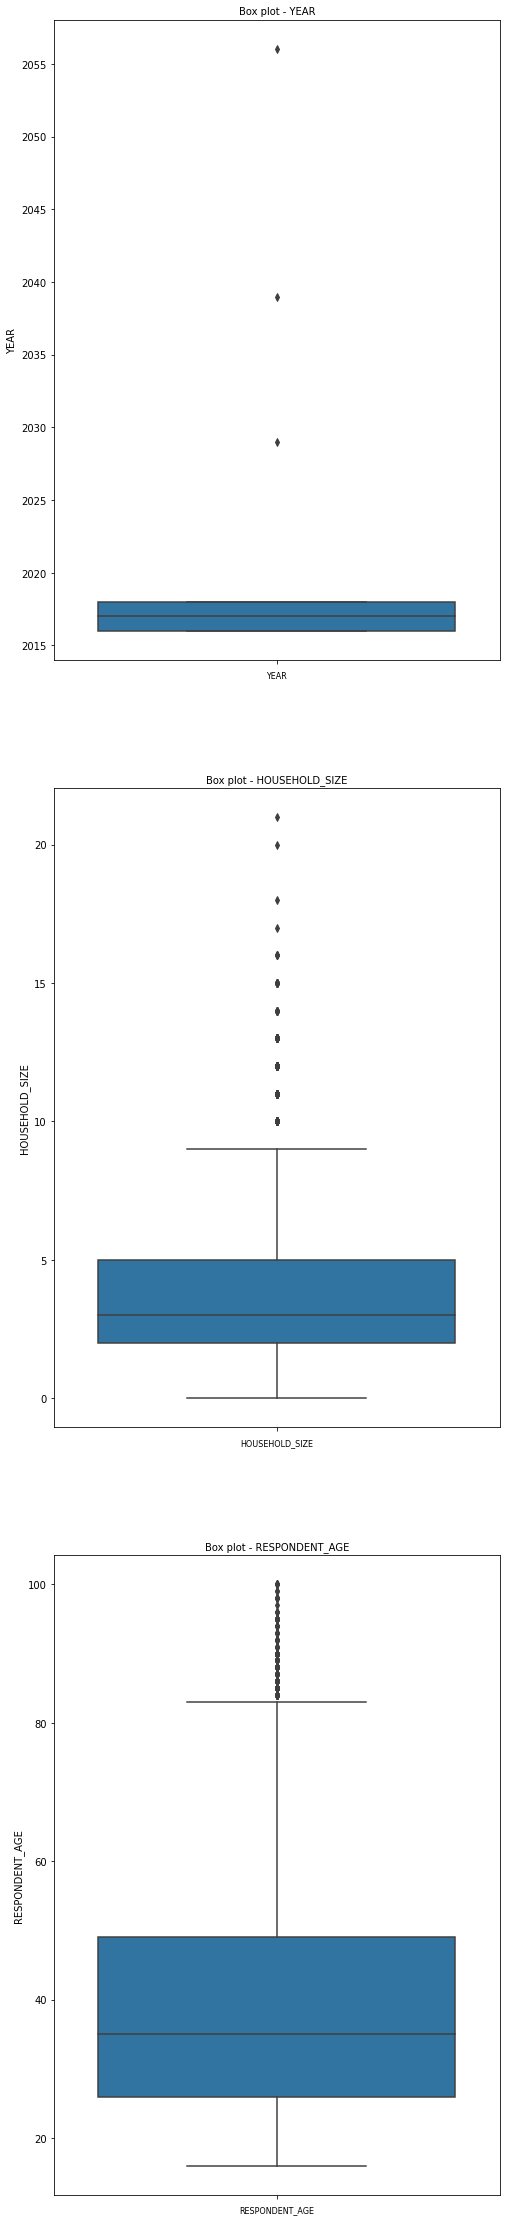

In [320]:
#Detection of outliers
col_names = ['YEAR','HOUSEHOLD_SIZE', 'RESPONDENT_AGE']

fig, ax = plt.subplots(len(col_names), figsize=(8,40))

for i, col_val in enumerate(col_names):

    sns.boxplot(y=df[col_val], ax=ax[i])
    ax[i].set_title('Box plot - {}'.format(col_val), fontsize=10)
    ax[i].set_xlabel(col_val, fontsize=8)

plt.show()

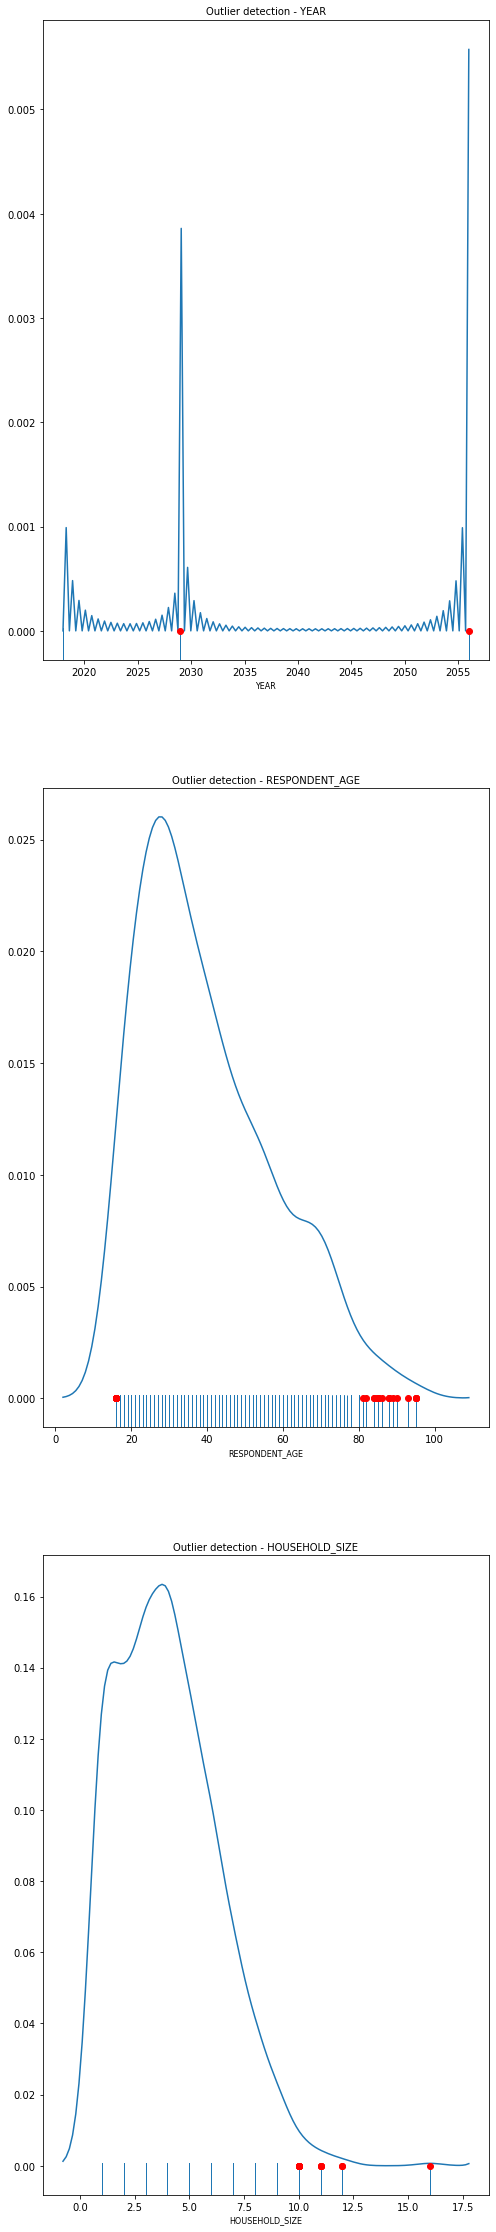

In [321]:
#Percentile based outlier removal.
def percentile_based_outlier(data, threshold=95):
    diff = (100 - threshold) / 2
    minval, maxval = np.percentile(data, [diff, 100 - diff])
    return (data < minval) | (data > maxval)

col_names = ['YEAR','RESPONDENT_AGE', 'HOUSEHOLD_SIZE']

fig, ax = plt.subplots(len(col_names), figsize=(8,40))

for i, col_val in enumerate(col_names):
    x = df[col_val][:1000]
    sns.distplot(x, ax=ax[i], rug=True, hist=False)
    outliers = x[percentile_based_outlier(x)]
    ax[i].plot(outliers, np.zeros_like(outliers), 'ro', clip_on=False)

    ax[i].set_title('Outlier detection - {}'.format(col_val), fontsize=10)
    ax[i].set_xlabel(col_val, fontsize=8)

plt.show()


In [322]:

gender={'Male':1,'Female':2}
df.GENDER_OF_RESPONDENT = [gender[item] for item in df.GENDER_OF_RESPONDENT]
df

/usr/local/lib/python3.6/dist-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


,COUNTRY,YEAR,UNIQUEID,HAS_A_BANK_ACCOUNT,TYPE_OF_LOCATION,CELL_PHONE_ACCESS,HOUSEHOLD_SIZE,RESPONDENT_AGE,GENDER_OF_RESPONDENT,THE_RELATHIP_WITH_HEAD,MARITAL_STATUS,LEVEL_OF_EDUCUATION,TYPE_OF_JOB
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3.0,24.0,2,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5.0,70.0,2,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5.0,26.0,1,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5.0,34.0,2,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8.0,26.0,1,Child,Single/Never Married,Primary education,Informally employed
...,...,...,...,...,...,...,...,...,...,...,...,...,...
23519,Uganda,2018,uniqueid_2113,No,Rural,Yes,4.0,48.0,2,Head of Household,Divorced/Seperated,No formal education,Other Income
23520,Uganda,2018,uniqueid_2114,No,Rural,Yes,2.0,27.0,2,Head of Household,Single/Never Married,Secondary education,Other Income
23521,Uganda,2018,uniqueid_2115,No,Rural,Yes,5.0,27.0,2,Parent,Widowed,Primary education,Other Income
23522,Uganda,2018,uniqueid_2116,No,Urban,Yes,7.0,30.0,2,Parent,Divorced/Seperated,Secondary education,Self employed


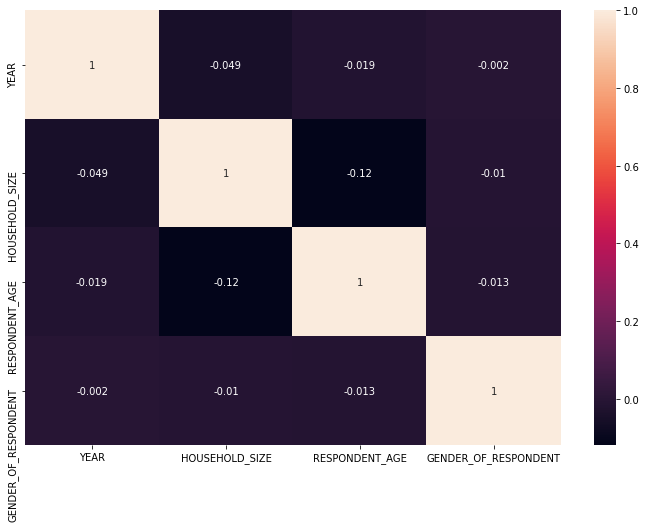

In [323]:
plt.figure(figsize=(12, 8))

df_corr = df.corr()
sns.heatmap(df_corr, 
            xticklabels = df_corr.columns.values,
            yticklabels = df_corr.columns.values,
            annot = True);

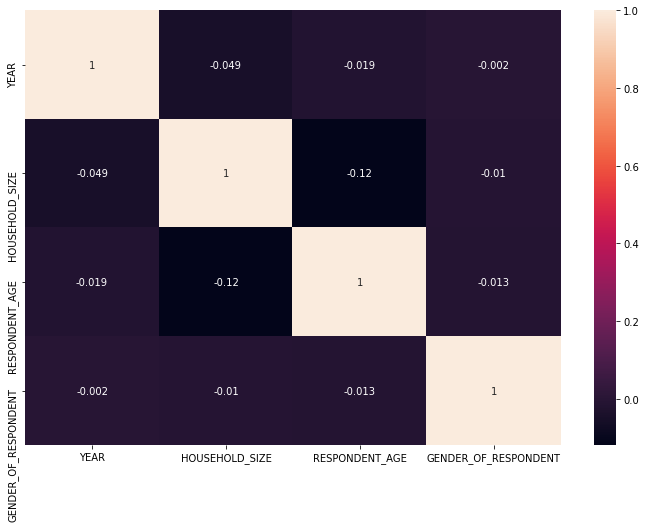

In [324]:
plt.figure(figsize=(12, 8))

df_corr = df.corr()
sns.heatmap(df_corr, 
            xticklabels = df_corr.columns.values,
            yticklabels = df_corr.columns.values,
            annot = True);

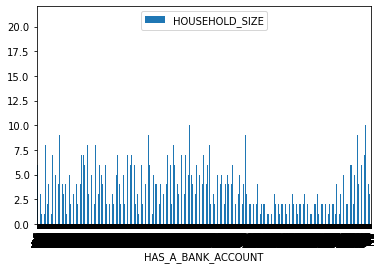

In [325]:
df.plot(x='HAS_A_BANK_ACCOUNT', y='HOUSEHOLD_SIZE', kind='bar') 
plt.show()

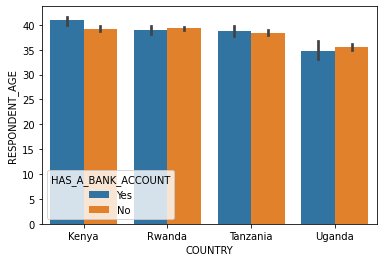

In [326]:
 sns.barplot(x = 'COUNTRY', y = 'RESPONDENT_AGE', data = df, hue = 'HAS_A_BANK_ACCOUNT')

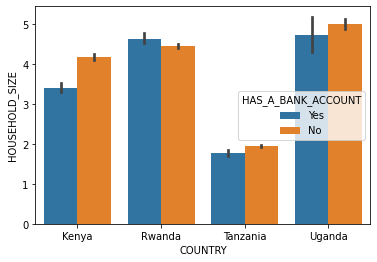

In [327]:
 sns.barplot(x = 'COUNTRY', y = 'HOUSEHOLD_SIZE', data = df, hue = 'HAS_A_BANK_ACCOUNT')